In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Data Framing

global_coffee_production = pd.read_csv("total-production.csv").T
global_coffee_production.columns = global_coffee_production.iloc[0]
global_coffee_production = global_coffee_production.drop("total_production")

global_coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [11]:
#To check data type information about dataframe
global_coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [20]:
#Checking Top Ten Coffee Producers

top_ten_coffee_producers = global_coffee_production.sum().sort_values(ascending=False).iloc[:15]

top_ten_coffee_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

In [21]:
top_ten_coffee_producers

total_production
Brazil           1190965.7353
Viet Nam          439540.9519
Colombia          345871.4464
Indonesia         245116.7707
Ethiopia          141542.8931
India              132025.681
Mexico            126908.2467
Guatemala         113401.0702
Honduras          105456.5888
Uganda              93146.369
Peru               84790.6704
Côte d'Ivoire      77097.2338
Costa Rica         58469.8885
El Salvador        46353.1457
Nicaragua          42548.3655
dtype: object

In [15]:
#Creating Pandas Dataframe with top six countries

topsix = global_coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia","India"]]
topsix.index = topsix.index.astype("datetime64[ns]")
topsix.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia,India
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451,2828.687
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664,2999.749
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171,2823.497
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004,3533.181
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73,3001.564


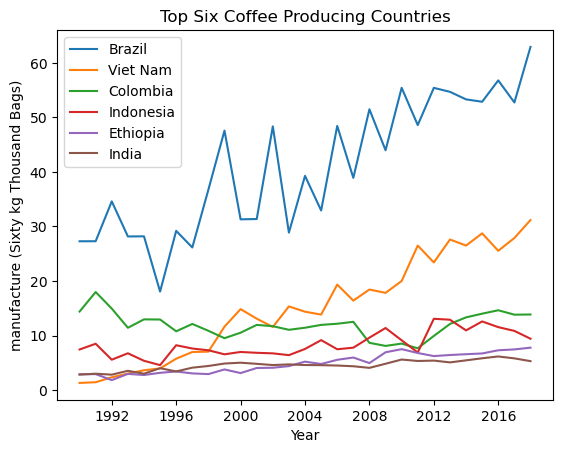

In [31]:
figure, axis = plt.subplots()

axis.plot(topsix.index, global_coffee_production["Brazil"] / 1000, label="Brazil")
axis.plot(topsix.index, global_coffee_production["Viet Nam"] / 1000, label="Viet Nam")
axis.plot(topsix.index, global_coffee_production["Colombia"] / 1000, label="Colombia")
axis.plot(topsix.index, global_coffee_production["Indonesia"] / 1000, label="Indonesia")
axis.plot(topsix.index, global_coffee_production["Ethiopia"] / 1000, label="Ethiopia")
axis.plot(topsix.index, global_coffee_production["India"] / 1000, label="India")

axis.set_title("Top Six Coffee Producing Countries")
axis.set_xlabel("Year")

axis.set_ylabel("manufacture (Sixty kg Thousand Bags)")


axis.legend()
plt.show()

In [24]:


#Creating new column called 'worldwide'

global_coffee_production["worldwide"] = global_coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                              "India"], axis=1).sum(axis=1)

global_coffee_production_topsix = global_coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "India",
                                                             "worldwide"
                                                            ]
                                                   ]

global_coffee_production_topsix

total_production
Brazil       62924.8836
Viet Nam     31174.0742
Colombia      13857.962
Indonesia     9417.5942
Ethiopia      7776.2234
India          5302.392
worldwide    40483.6083
Name: 2018, dtype: object

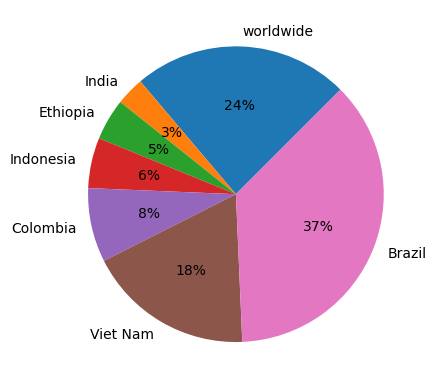

In [29]:
#Pie Chart
figure, axis = plt.subplots()

axis.pie(global_coffee_production_topsix[::-1],
       autopct="%.0f%%",
       labels=list(global_coffee_production_topsix.index[::-1]),
       startangle=45
      )
plt.show()

In [35]:
#Build a chart that global coffee total production as well as Brazil and Viet Nam
#contribution to global coffee production over time.


brazil_vs_remainingworldwide = (global_coffee_production
                    .assign(worldwide = global_coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "worldwide"]]
                    .astype({"Brazil": "float64"})
                   )

brazil_vs_remainingworldwide



total_production,Brazil,worldwide
1990,27285.6286,103003.0530
1991,27293.4934,114110.5280
1992,34603.3542,100339.6190
1993,28166.9786,99509.1750
1994,28192.0470,102514.5130
1995,18060.2022,109855.6310
1996,29196.7430,116635.2280
1997,26148.0040,113538.5540
1998,36760.8533,111702.5876
1999,47577.8065,131261.1143


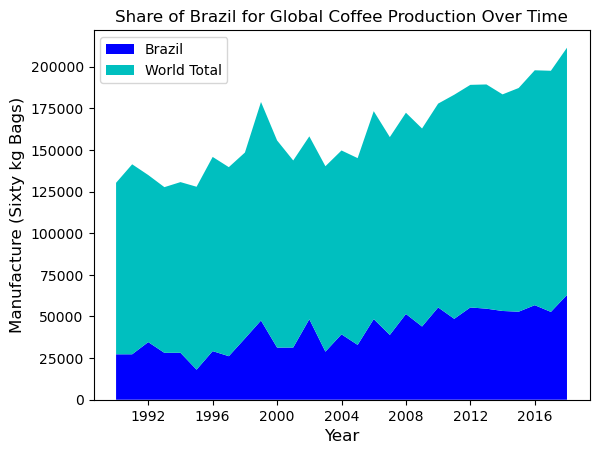

In [57]:
figure, axis = plt.subplots()

axis.stackplot(
    brazil_vs_remainingworldwide.index.astype("datetime64[ns]"), 
    brazil_vs_remainingworldwide["Brazil"], 
    brazil_vs_remainingworldwide["worldwide"],colors =['b', 'c'],
    labels=["Brazil", "World Total"]
)


axis.set_title("Share of Brazil for Global Coffee Production Over Time")
axis.set_xlabel("Year", fontsize=12)

axis.set_ylabel("Manufacture (Sixty kg Bags)", fontsize=12)

axis.legend(loc="upper left")

plt.show()

In [53]:

vietnam_vs_remainingworldwide = (global_coffee_production
                    .assign(worldwide = global_coffee_production
                            .drop("Viet Nam", axis=1).sum(axis=1))
                    .loc[:, ["Viet Nam", "worldwide"]]
                    .astype({"Viet Nam": "float64"})
                   )

In [54]:
vietnam_vs_remainingworldwide

total_production,Viet Nam,worldwide
1990,1310.2880,128978.3936
1991,1437.8480,139966.1734
1992,2340.4470,132602.5262
1993,3020.2160,124655.9376
1994,3631.6090,127074.9510
1995,3970.0860,123945.7472
1996,5752.4810,140079.4900
1997,6978.9420,132707.6160
1998,7051.7220,141411.7189
1999,11630.9138,167208.0070


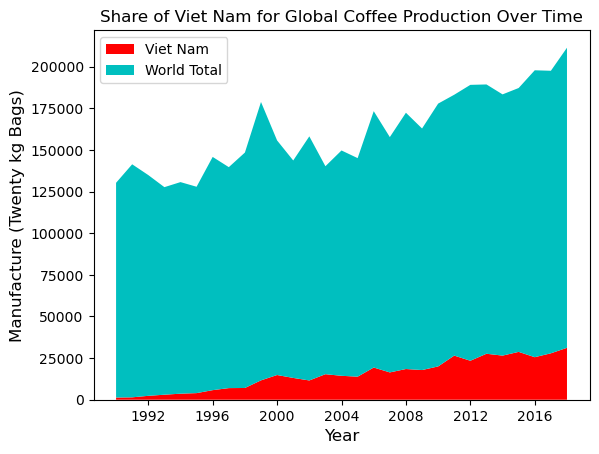

In [60]:
figure, axis = plt.subplots()

axis.stackplot(
    vietnam_vs_remainingworldwide.index.astype("datetime64[ns]"), 
    vietnam_vs_remainingworldwide["Viet Nam"], 
    vietnam_vs_remainingworldwide["worldwide"],colors =['r', 'c'],
    labels=["Viet Nam", "World Total"]
)


axis.set_title("Share of Viet Nam for Global Coffee Production Over Time")
axis.set_xlabel("Year", fontsize=12)

axis.set_ylabel("Manufacture (Twenty kg Bags)", fontsize=12)

axis.legend(loc="upper left")

plt.show()